<a href="https://colab.research.google.com/github/dongjun0001/Dataquest/blob/main/Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install yfinance
import yfinance as yf
import os
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
btc_ticker = yf.Ticker("BTC-USD")

In [12]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [13]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-09-15,20242.289062,20318.166016,19636.734375,19701.210938,36389011503,0,0
2022-09-16,19704.005859,19870.628906,19400.076172,19772.583984,30123362273,0,0
2022-09-17,19777.033203,20162.531250,19777.033203,20127.576172,24957448100,0,0


In [14]:
btc.index = pd.to_datetime(btc.index)

In [15]:
del btc["Dividends"]
del btc["Stock Splits"]

In [16]:
btc.columns = [c.lower() for c in btc.columns]

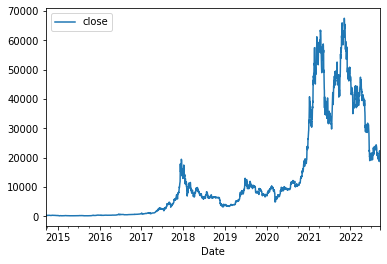

In [17]:
btc.plot.line(y="close", use_index=True)

In [20]:
wiki = pd.read_csv("wikipedia_edits.csv",index_col=0, parse_dates=True)

In [21]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [22]:
btc

,open,high,low,close,volume,edit_count
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333
...,...,...,...,...,...,...
2022-09-15,20242.289062,20318.166016,19636.734375,19701.210938,36389011503,0.533333
2022-09-16,19704.005859,19870.628906,19400.076172,19772.583984,30123362273,0.433333
2022-09-17,19777.033203,20162.531250,19777.033203,20127.576172,24957448100,0.566667
2022-09-18,20127.234375,20127.234375,19387.492188,19419.505859,31254779144,0.566667


In [23]:
btc["tomorrow"] = btc["close"].shift(-1)

In [24]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)

In [25]:
btc["target"].value_counts()

1    1569
0    1356
Name: target, dtype: int64

In [26]:
btc

,open,high,low,close,volume,edit_count,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,402.152008,1
...,...,...,...,...,...,...,...,...
2022-09-15,20242.289062,20318.166016,19636.734375,19701.210938,36389011503,0.533333,19772.583984,1
2022-09-16,19704.005859,19870.628906,19400.076172,19772.583984,30123362273,0.433333,20127.576172,1
2022-09-17,19777.033203,20162.531250,19777.033203,20127.576172,24957448100,0.566667,19419.505859,0
2022-09-18,20127.234375,20127.234375,19387.492188,19419.505859,31254779144,0.566667,18670.902344,0


In [27]:
# Training baseline ML model

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count"] #"sentiment", "neg_sentiment"
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [28]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.4573170731707317

In [29]:
#Evaluating error with backtesting

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [30]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [31]:
#XGBoost model

from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [32]:
precision_score(predictions["target"],predictions["predictions"])

0.5124804992199687

In [33]:
predictions["predictions"].value_counts()

1    1282
0     548
Name: predictions, dtype: int64

In [34]:
#Add predictors to imporve precision of predictions

def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close"] #"sentiment", "neg_sentiment"

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [35]:
btc, new_predictors = compute_rolling(btc.copy())

In [36]:
btc

,open,high,low,close,volume,edit_count,tomorrow,target,close_ratio_2,edit_2,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,424.440002,0,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,394.795990,0,0.962696,5.050000,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,408.903992,1,0.963815,5.133333,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,398.821014,0,1.017554,5.200000,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,402.152008,1,0.987517,5.216667,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-15,20242.289062,20318.166016,19636.734375,19701.210938,36389011503,0.533333,19772.583984,1,0.986484,0.533333,0.0,0.935351,0.538095,0.571429,0.896722,0.270000,0.433333,0.508514,0.885479,0.479452
2022-09-16,19704.005859,19870.628906,19400.076172,19772.583984,30123362273,0.433333,20127.576172,1,1.001808,0.483333,0.5,0.949094,0.533333,0.571429,0.901827,0.271667,0.433333,0.511369,0.884384,0.482192
2022-09-17,19777.033203,20162.531250,19777.033203,20127.576172,24957448100,0.566667,19419.505859,0,1.008897,0.500000,1.0,0.976533,0.533333,0.571429,0.920300,0.277778,0.433333,0.521553,0.883744,0.484932
2022-09-18,20127.234375,20127.234375,19387.492188,19419.505859,31254779144,0.566667,18670.902344,0,0.982096,0.566667,0.5,0.957778,0.533333,0.428571,0.890512,0.283889,0.433333,0.504238,0.883288,0.482192


In [37]:
predictions = backtest(btc, model, new_predictors)

In [38]:
precision_score(predictions["target"], predictions["predictions"])

0.5328142380422692

In [39]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2022-09-15,1,1
2022-09-16,1,1
2022-09-17,0,1
2022-09-18,0,1
